# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.mode.copy_on_write = True

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request

## 2. Datos

In [ ]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv", index_col= "laptop_ID")
df.index.name = None

### 2.1 Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [6]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


### 2.3 Definir X e y

In [7]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 11)

In [8]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
X_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg
...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg
407,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.2kg


In [11]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [12]:
target = "Price_in_euros"

<Axes: xlabel='Price_in_euros', ylabel='Count'>

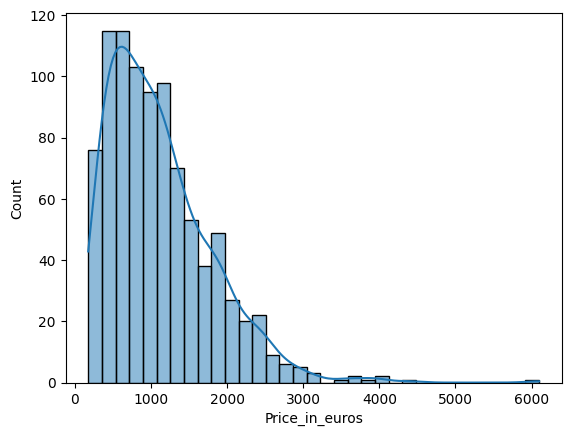

In [13]:
sns.histplot(x= target, data = df, kde= True )

#### Transformación de variables

In [14]:
X_train.sample(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1025,HP,EliteBook 820,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.26kg
516,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg
1292,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg
749,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2kg
695,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M430,Windows 10,2.2kg
8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
1279,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg
470,Lenovo,IdeaPad 510s-14IKB,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,AMD Radeon R7 M460,No OS,1.5kg
614,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.4kg
1191,Lenovo,V110-15ISK (i5-6200U/4GB/500GB/No,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,2.1kg


In [15]:
X_train["Product"].value_counts() # --> Lo mejor será crear una agrupación de categorías

Product
XPS 13                                     20
Inspiron 3567                              17
250 G6                                     12
ProBook 450                                12
EliteBook 840                              11
                                           ..
V330-15IKB (i5-8250U/4GB/256GB/FHD/W10)     1
Thinkpad T460s                              1
ThinkPad T460                               1
17-BS092ND (i3-6006U/8GB/256GB/W10)         1
SP315-51 (i7-7500U/12GB/1TB/FHD/W10)        1
Name: count, Length: 408, dtype: int64

In [16]:
# Top 5 productos más frecuentes
top_5_products = X_train["Product"].value_counts().nlargest(5).index

# Crear nueva columna agrupada
X_train["Product_grouped"] = X_train["Product"].where(X_train["Product"].isin(top_5_products), other="Other")

# Elimino product de train
X_train = X_train.drop(columns=["Product"])

# Aplicar en test
X_test["Product_grouped"] = X_test["Product"].where(X_test["Product"].isin(top_5_products), other="Other")
X_test = X_test.drop(columns=["Product"])


In [17]:
X_train["Product_grouped"].value_counts()

Product_grouped
Other            657
XPS 13            20
Inspiron 3567     17
ProBook 450       12
250 G6            12
EliteBook 840     11
Name: count, dtype: int64

In [18]:
X_train.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Product_grouped'],
      dtype='object')

In [19]:
X_train["TypeName"].value_counts() # no hace falta reducir categorías

TypeName
Notebook              412
Gaming                113
Ultrabook             113
2 in 1 Convertible     62
Netbook                16
Workstation            13
Name: count, dtype: int64

In [20]:
X_train["ScreenResolution"].value_counts() # Se pueden crear otras columnas con la información que tenemos 

ScreenResolution
Full HD 1920x1080                                280
1366x768                                         170
IPS Panel Full HD 1920x1080                      130
Full HD / Touchscreen 1920x1080                   26
IPS Panel Full HD / Touchscreen 1920x1080         25
1600x900                                          14
Quad HD+ / Touchscreen 3200x1800                  10
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel 4K Ultra HD 3840x2160                    5
4K Ultra HD / Touchscreen 3840x2160                5
Touchscreen 1366x768                               5
1440x900                                           4
Touchscreen 2560x1440                              4
IPS Panel 1366x768                                 4
IPS Panel Retina Display 2560x1600                 3
IPS Panel Retina Display 2304x1440                 3
IPS Panel 2560x1440                                3
Touchscreen 2256x1504        

In [21]:
# Resolución
X_train["Width"] = X_train["ScreenResolution"].str.extract(r'(\d+)x')[0].astype(float)
X_train["Height"] = X_train["ScreenResolution"].str.extract(r'x(\d+)')[0].astype(float)

In [22]:
# Pixeles por pulgada
X_train["PPI"] = ((X_train["Width"]**2 + X_train["Height"]**2)**0.5) / X_train["Inches"]

In [23]:
# Pantalla Ips (1 Ips 0 no)
X_train["IPS"] = X_train["ScreenResolution"].str.contains("IPS", case=False).astype(int) # rep.color, ángulo de visión, contraste
# Pantalla táctil
X_train["Touchscreen"] = X_train["ScreenResolution"].str.contains("Touchscreen", case=False).astype(int)

In [24]:
X_train = X_train.drop(columns=["ScreenResolution"])

In [25]:
# Aplicar a test
X_test["Width"] = X_test["ScreenResolution"].str.extract(r'(\d+)x')[0].astype(float)
X_test["Height"] = X_test["ScreenResolution"].str.extract(r'x(\d+)')[0].astype(float)

X_test["PPI"] = ((X_test["Width"]**2 + X_test["Height"]**2)**0.5) / X_test["Inches"]

X_test["IPS"] = X_test["ScreenResolution"].str.contains("IPS", case=False).astype(int)
X_test["Touchscreen"] = X_test["ScreenResolution"].str.contains("Touchscreen", case=False).astype(int)

X_test = X_test.drop(columns=["ScreenResolution"])

In [26]:
X_train["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       100
Intel Core i7 7700HQ 2.8GHz       82
Intel Core i7 7500U 2.7GHz        77
Intel Core i5 8250U 1.6GHz        46
Intel Core i7 8550U 1.8GHz        40
                                ... 
Intel Core i5 7500U 2.7GHz         1
Intel Core i3 6100U 2.1GHz         1
Intel Core M 1.1GHz                1
Intel Xeon E3-1535M v5 2.9GHz      1
AMD E-Series 6110 1.5GHz           1
Name: count, Length: 93, dtype: int64

In [27]:
X_train["Cpu_brand"] = X_train["Cpu"].str.split().str[0]

In [28]:
X_train["Cpu_type"] = X_train["Cpu"].str.extract(r'(i3|i5|i7|i9)')

In [29]:
X_train["Cpu_freq"] = X_train["Cpu"].str.extract(r'(\d+\.\d+)').astype(float)

In [30]:
X_train = X_train.drop(columns=["Cpu"])

In [31]:
# Aplicar a test
X_test["Cpu_brand"] = X_test["Cpu"].str.split().str[0]

X_test["Cpu_type"] = X_test["Cpu"].str.extract(r'(i3|i5|i7|i9)')

X_test["Cpu_freq"] = X_test["Cpu"].str.extract(r'(\d+\.\d+)').astype(float)

X_test = X_test.drop(columns=["Cpu"])

In [32]:
X_train["Ram"] = X_train["Ram"].str.replace("GB", "").astype(int)
X_test["Ram"] = X_test["Ram"].str.replace("GB", "").astype(int)

In [33]:
X_train["Memory"].value_counts()

Memory
256GB SSD                 226
1TB HDD                   122
500GB HDD                  80
512GB SSD                  62
128GB SSD +  1TB HDD       56
128GB SSD                  45
256GB SSD +  1TB HDD       43
32GB Flash Storage         23
1TB SSD                     8
64GB Flash Storage          8
256GB Flash Storage         7
512GB SSD +  1TB HDD        6
256GB SSD +  2TB HDD        6
2TB HDD                     6
16GB Flash Storage          4
128GB Flash Storage         4
1.0TB Hybrid                3
32GB SSD                    3
512GB SSD +  2TB HDD        2
180GB SSD                   2
8GB SSD                     1
1TB SSD +  1TB HDD          1
128GB HDD                   1
240GB SSD                   1
512GB Flash Storage         1
512GB SSD +  512GB SSD      1
1TB HDD +  1TB HDD          1
1.0TB HDD                   1
256GB SSD +  256GB SSD      1
16GB SSD                    1
128GB SSD +  2TB HDD        1
508GB Hybrid                1
64GB SSD                    1
Nam

In [34]:
def procesar_memoria(mem):
    partes = mem.split(" + ")
    total_gb = 0
    tipos = set()

    for parte in partes:
        parte = parte.strip()

        # tamaño (primera palabra)
        size = parte.split()[0]  # "128GB" o "1TB" o "1.0TB"

        # tipo (última palabra)
        tipo = parte.split()[-1]  # SSD, HDD, Hybrid, Storage...

        # convertir tamaño a GB
        if "TB" in size:
            gb = float(size.replace("TB", "")) * 1000
        else:
            gb = float(size.replace("GB", ""))

        total_gb += gb

        # normalizar tipo
        if "SSD" in tipo:
            tipos.add("SSD")
        elif "HDD" in tipo:
            tipos.add("HDD")
        elif "Flash" in parte:
            tipos.add("Flash")
        elif "Hybrid" in parte:
            tipos.add("Hybrid")
        else:
            tipos.add("Other")

    # si hay más de un tipo -> Mixed
    tipo_final = list(tipos)[0] if len(tipos) == 1 else "Mixed"

    return pd.Series([total_gb, tipo_final])

In [35]:
X_train[["Memory_Size", "Memory_Type"]] = X_train["Memory"].apply(procesar_memoria)
X_train = X_train.drop(columns=["Memory"])

In [36]:
X_test[["Memory_Size", "Memory_Type"]] = X_test["Memory"].apply(procesar_memoria)
X_test = X_test.drop(columns=["Memory"])

In [37]:
X_train["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      150
Intel HD Graphics 520      110
Intel UHD Graphics 620      43
Nvidia GeForce GTX 1050     32
Nvidia GeForce 940MX        24
                          ... 
Nvidia GeForce GTX 940M      1
Intel HD Graphics 620        1
Intel HD Graphics 5300       1
Nvidia Quadro M2000M         1
AMD R17M-M1-70               1
Name: count, Length: 84, dtype: int64

In [38]:
X_train["Gpu_Brand"] = X_train["Gpu"].str.split().str[0]
X_test["Gpu_Brand"] = X_test["Gpu"].str.split().str[0]

In [39]:
def obtener_gpu_type(gpu):
    gpu_lower = gpu.lower()

    if "geforce" in gpu_lower:
        return "GeForce"
    elif "radeon" in gpu_lower:
        return "Radeon"
    elif "hd graphics" in gpu_lower:
        return "HD Graphics"
    elif "uhd graphics" in gpu_lower:
        return "UHD Graphics"
    elif "iris" in gpu_lower:
        return "Iris"
    elif "vega" in gpu_lower:
        return "Vega"
    else:
        return "Other"
    
X_train["Gpu_Type"] = X_train["Gpu"].apply(obtener_gpu_type)
X_test["Gpu_Type"] = X_test["Gpu"].apply(obtener_gpu_type)

In [40]:
def extraer_gpu_model(gpu):
    partes = gpu.split()
    
    for p in partes:
        # si contiene un dígito, es un modelo
        if any(c.isdigit() for c in p):
            return p
    
    # si no hay números → GPU integrada sin modelo
    return "None"

In [41]:
X_train["Gpu_Model"] = X_train["Gpu"].apply(extraer_gpu_model)
X_test["Gpu_Model"] = X_test["Gpu"].apply(extraer_gpu_model)


In [42]:
X_train = X_train.drop(columns=["Gpu"])
X_test = X_test.drop(columns=["Gpu"])

In [43]:
X_train["OpSys"].value_counts() # No creo que sea necesario hacer ninguna transformación

OpSys
Windows 10      596
No OS            39
Linux            37
Windows 7        24
Chrome OS        14
macOS             7
Mac OS X          6
Windows 10 S      5
Android           1
Name: count, dtype: int64

In [44]:
X_train["Weight"] = X_train["Weight"].str.replace("kg", "").astype(float)
X_test["Weight"] = X_test["Weight"].str.replace("kg", "").astype(float)

In [45]:
X_train

,Company,TypeName,Inches,Ram,OpSys,Weight,Product_grouped,Width,Height,PPI,IPS,Touchscreen,Cpu_brand,Cpu_type,Cpu_freq,Memory_Size,Memory_Type,Gpu_Brand,Gpu_Type,Gpu_Model
1118,HP,Workstation,17.3,8,Windows 7,3.00,Other,1920.0,1080.0,127.335675,1,0,Intel,i7,2.6,1000.0,HDD,AMD,Other,W6150M
153,Dell,Gaming,15.6,16,Windows 10,2.56,Other,1920.0,1080.0,141.211998,0,0,Intel,i7,2.8,512.0,SSD,Nvidia,GeForce,1050
275,Apple,Ultrabook,13.3,8,macOS,1.37,Other,2560.0,1600.0,226.983005,1,0,Intel,i5,2.9,512.0,SSD,Intel,Iris,550
1100,HP,Notebook,14.0,4,Windows 7,1.54,EliteBook 840,1920.0,1080.0,157.350512,0,0,Intel,i5,2.3,500.0,HDD,Intel,HD Graphics,520
131,Dell,Notebook,17.3,16,Windows 10,2.80,Other,1920.0,1080.0,127.335675,0,0,Intel,i7,1.8,2256.0,Mixed,AMD,Radeon,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,HP,Notebook,14.0,8,Windows 10,1.94,Other,1366.0,768.0,111.935204,0,0,Intel,NaN,1.6,2000.0,HDD,Intel,HD Graphics,405
996,Lenovo,Notebook,15.6,6,Windows 10,2.20,Other,1920.0,1080.0,141.211998,0,0,AMD,NaN,3.6,256.0,SSD,AMD,Radeon,530
770,Dell,Ultrabook,12.5,16,Windows 10,1.18,Other,1920.0,1080.0,176.232574,0,0,Intel,i7,2.8,256.0,SSD,Intel,HD Graphics,620
407,Lenovo,Notebook,15.6,4,Windows 10,2.20,Other,1366.0,768.0,100.454670,0,0,Intel,NaN,1.1,1000.0,HDD,Intel,HD Graphics,500


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          729 non-null    object 
 1   TypeName         729 non-null    object 
 2   Inches           729 non-null    float64
 3   Ram              729 non-null    int64  
 4   OpSys            729 non-null    object 
 5   Weight           729 non-null    float64
 6   Product_grouped  729 non-null    object 
 7   Width            729 non-null    float64
 8   Height           729 non-null    float64
 9   PPI              729 non-null    float64
 10  IPS              729 non-null    int64  
 11  Touchscreen      729 non-null    int64  
 12  Cpu_brand        729 non-null    object 
 13  Cpu_type         605 non-null    object 
 14  Cpu_freq         686 non-null    float64
 15  Memory_Size      729 non-null    float64
 16  Memory_Type      729 non-null    object 
 17  Gpu_Brand        7

In [47]:
X_train.describe()

,Inches,Ram,Weight,Width,Height,PPI,IPS,Touchscreen,Cpu_freq,Memory_Size
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,686.000000,729.000000
mean,15.002881,8.233196,2.033752,1886.576132,1065.163237,146.227992,0.267490,0.134431,2.285335,602.716049
std,1.428711,4.986294,0.668108,492.107787,281.591410,43.808523,0.442954,0.341349,0.522794,462.953226
min,10.100000,2.000000,0.690000,1366.000000,768.000000,90.583402,0.000000,0.000000,0.900000,8.000000
25%,14.000000,4.000000,1.500000,1440.000000,900.000000,127.335675,0.000000,0.000000,1.800000,256.000000
50%,15.600000,8.000000,2.040000,1920.000000,1080.000000,141.211998,0.000000,0.000000,2.500000,500.000000
75%,15.600000,8.000000,2.300000,1920.000000,1080.000000,157.350512,1.000000,0.000000,2.700000,1000.000000
max,17.300000,64.000000,4.700000,3840.000000,2160.000000,352.465147,1.000000,1.000000,3.600000,2512.000000


In [48]:
# Imputamos la moda
moda_type = X_train["Cpu_type"].mode()[0]
X_train["Cpu_type"] = X_train["Cpu_type"].fillna(moda_type)
X_test["Cpu_type"] = X_test["Cpu_type"].fillna(moda_type)

In [49]:
# Imputamos la mediana para evitar valores extremos
mediana_freq = X_train["Cpu_freq"].median()
X_train["Cpu_freq"] = X_train["Cpu_freq"].fillna(mediana_freq)
X_test["Cpu_freq"] = X_test["Cpu_freq"].fillna(mediana_freq)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          729 non-null    object 
 1   TypeName         729 non-null    object 
 2   Inches           729 non-null    float64
 3   Ram              729 non-null    int64  
 4   OpSys            729 non-null    object 
 5   Weight           729 non-null    float64
 6   Product_grouped  729 non-null    object 
 7   Width            729 non-null    float64
 8   Height           729 non-null    float64
 9   PPI              729 non-null    float64
 10  IPS              729 non-null    int64  
 11  Touchscreen      729 non-null    int64  
 12  Cpu_brand        729 non-null    object 
 13  Cpu_type         729 non-null    object 
 14  Cpu_freq         729 non-null    float64
 15  Memory_Size      729 non-null    float64
 16  Memory_Type      729 non-null    object 
 17  Gpu_Brand        7

In [51]:
features_num = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
features_cat = X_train.select_dtypes(include=["object"]).columns.tolist()

features_num, features_cat

(['Inches',
  'Ram',
  'Weight',
  'Width',
  'Height',
  'PPI',
  'IPS',
  'Touchscreen',
  'Cpu_freq',
  'Memory_Size'],
 ['Company',
  'TypeName',
  'OpSys',
  'Product_grouped',
  'Cpu_brand',
  'Cpu_type',
  'Memory_Type',
  'Gpu_Brand',
  'Gpu_Type',
  'Gpu_Model'])

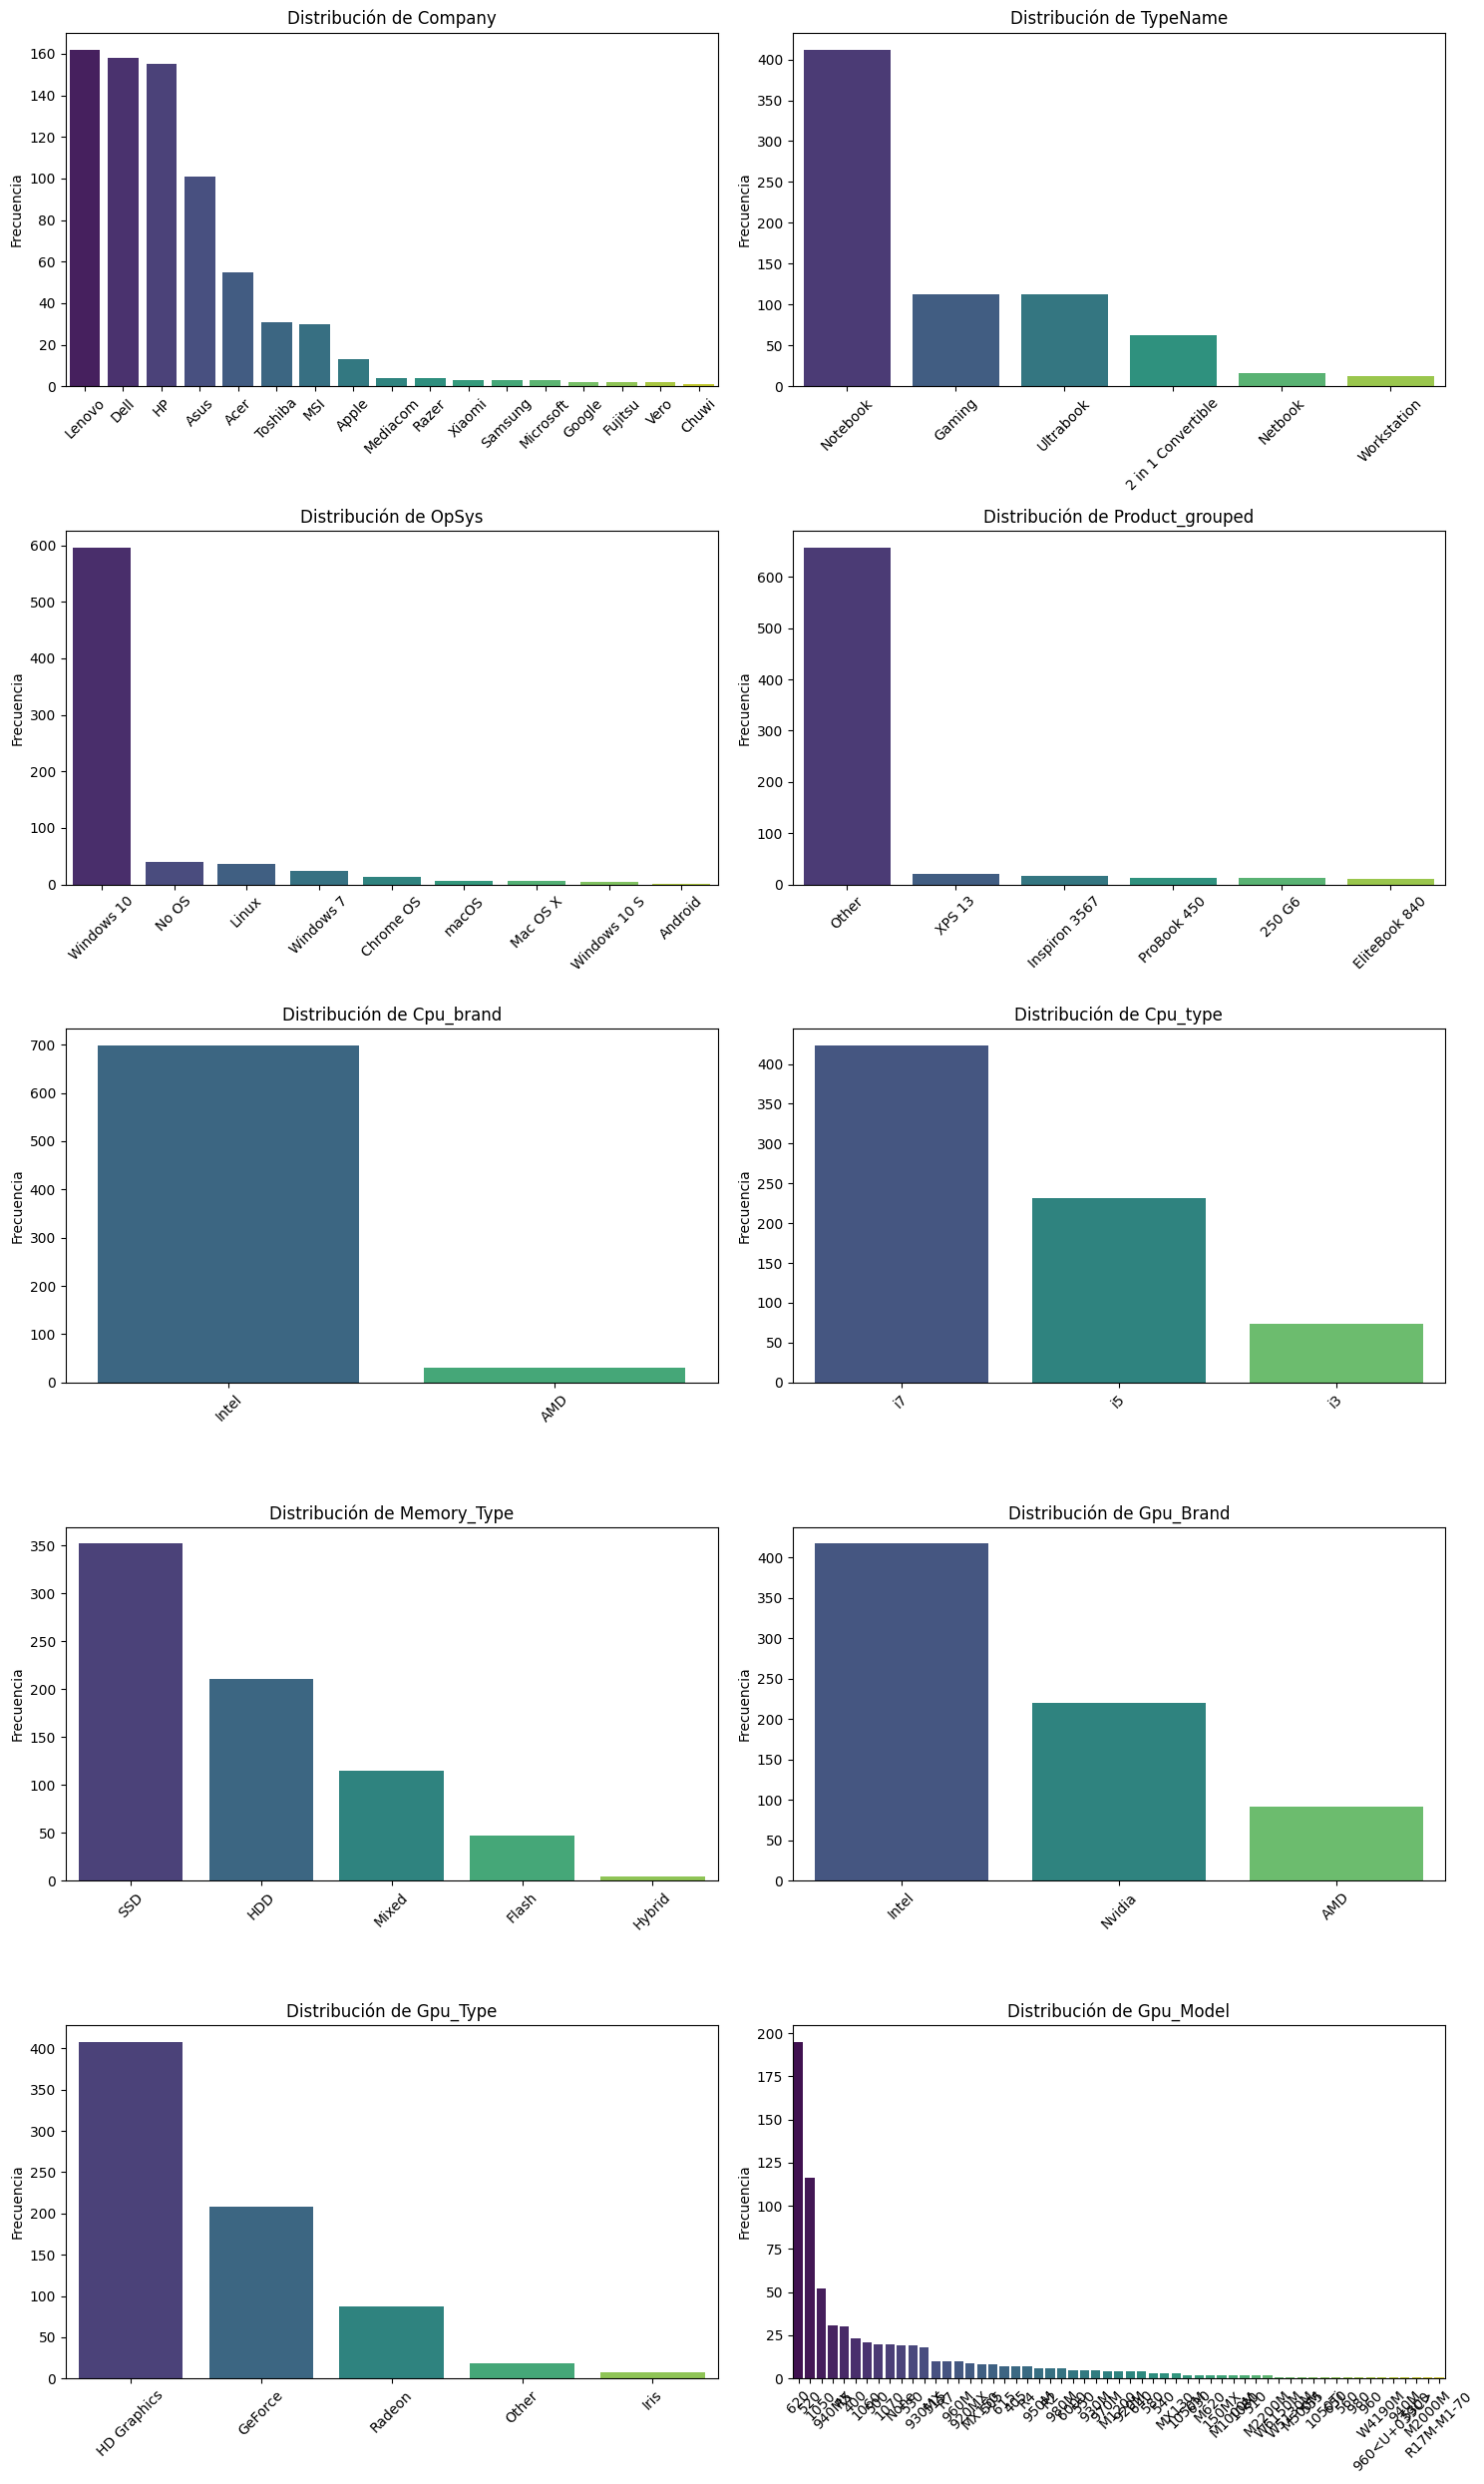

In [52]:
bt.pinta_distribucion_categoricas(X_train, features_cat, relativa=False, mostrar_valores=False)

In [53]:
X_train["Gpu_Model"].value_counts()

Gpu_Model
620            195
520            116
1050            52
940MX           31
R5              30
400             23
1060            21
500             20
1070            20
None            19
530             19
930MX           18
515             10
R7              10
960M            10
920MX            9
MX150            8
505              8
615              7
405              7
R4               7
950M             6
R2               6
980M             6
6000             5
550              5
930M             5
970M             4
M1200            4
920M             4
640              4
580              3
540              3
MX130            3
1050M            2
630              2
M620             2
150MX            2
M1000M           2
1080             2
510              2
M2200M           2
W6150M           1
W5130M           1
M500M            1
555              1
1050Ti           1
650              1
560              1
980              1
960              1
W4190M           1
96

In [54]:
frecuencias = X_train["Gpu_Model"].value_counts()

# Identificar los modelos con menos de 10 apariciones
modelos_menos_10 = frecuencias[frecuencias < 10].index

# Reemplazar esos modelos por "Other" en train y test
X_train["Gpu_Model"] = X_train["Gpu_Model"].replace(modelos_menos_10, "Other")
X_test["Gpu_Model"] = X_test["Gpu_Model"].replace(modelos_menos_10, "Other")

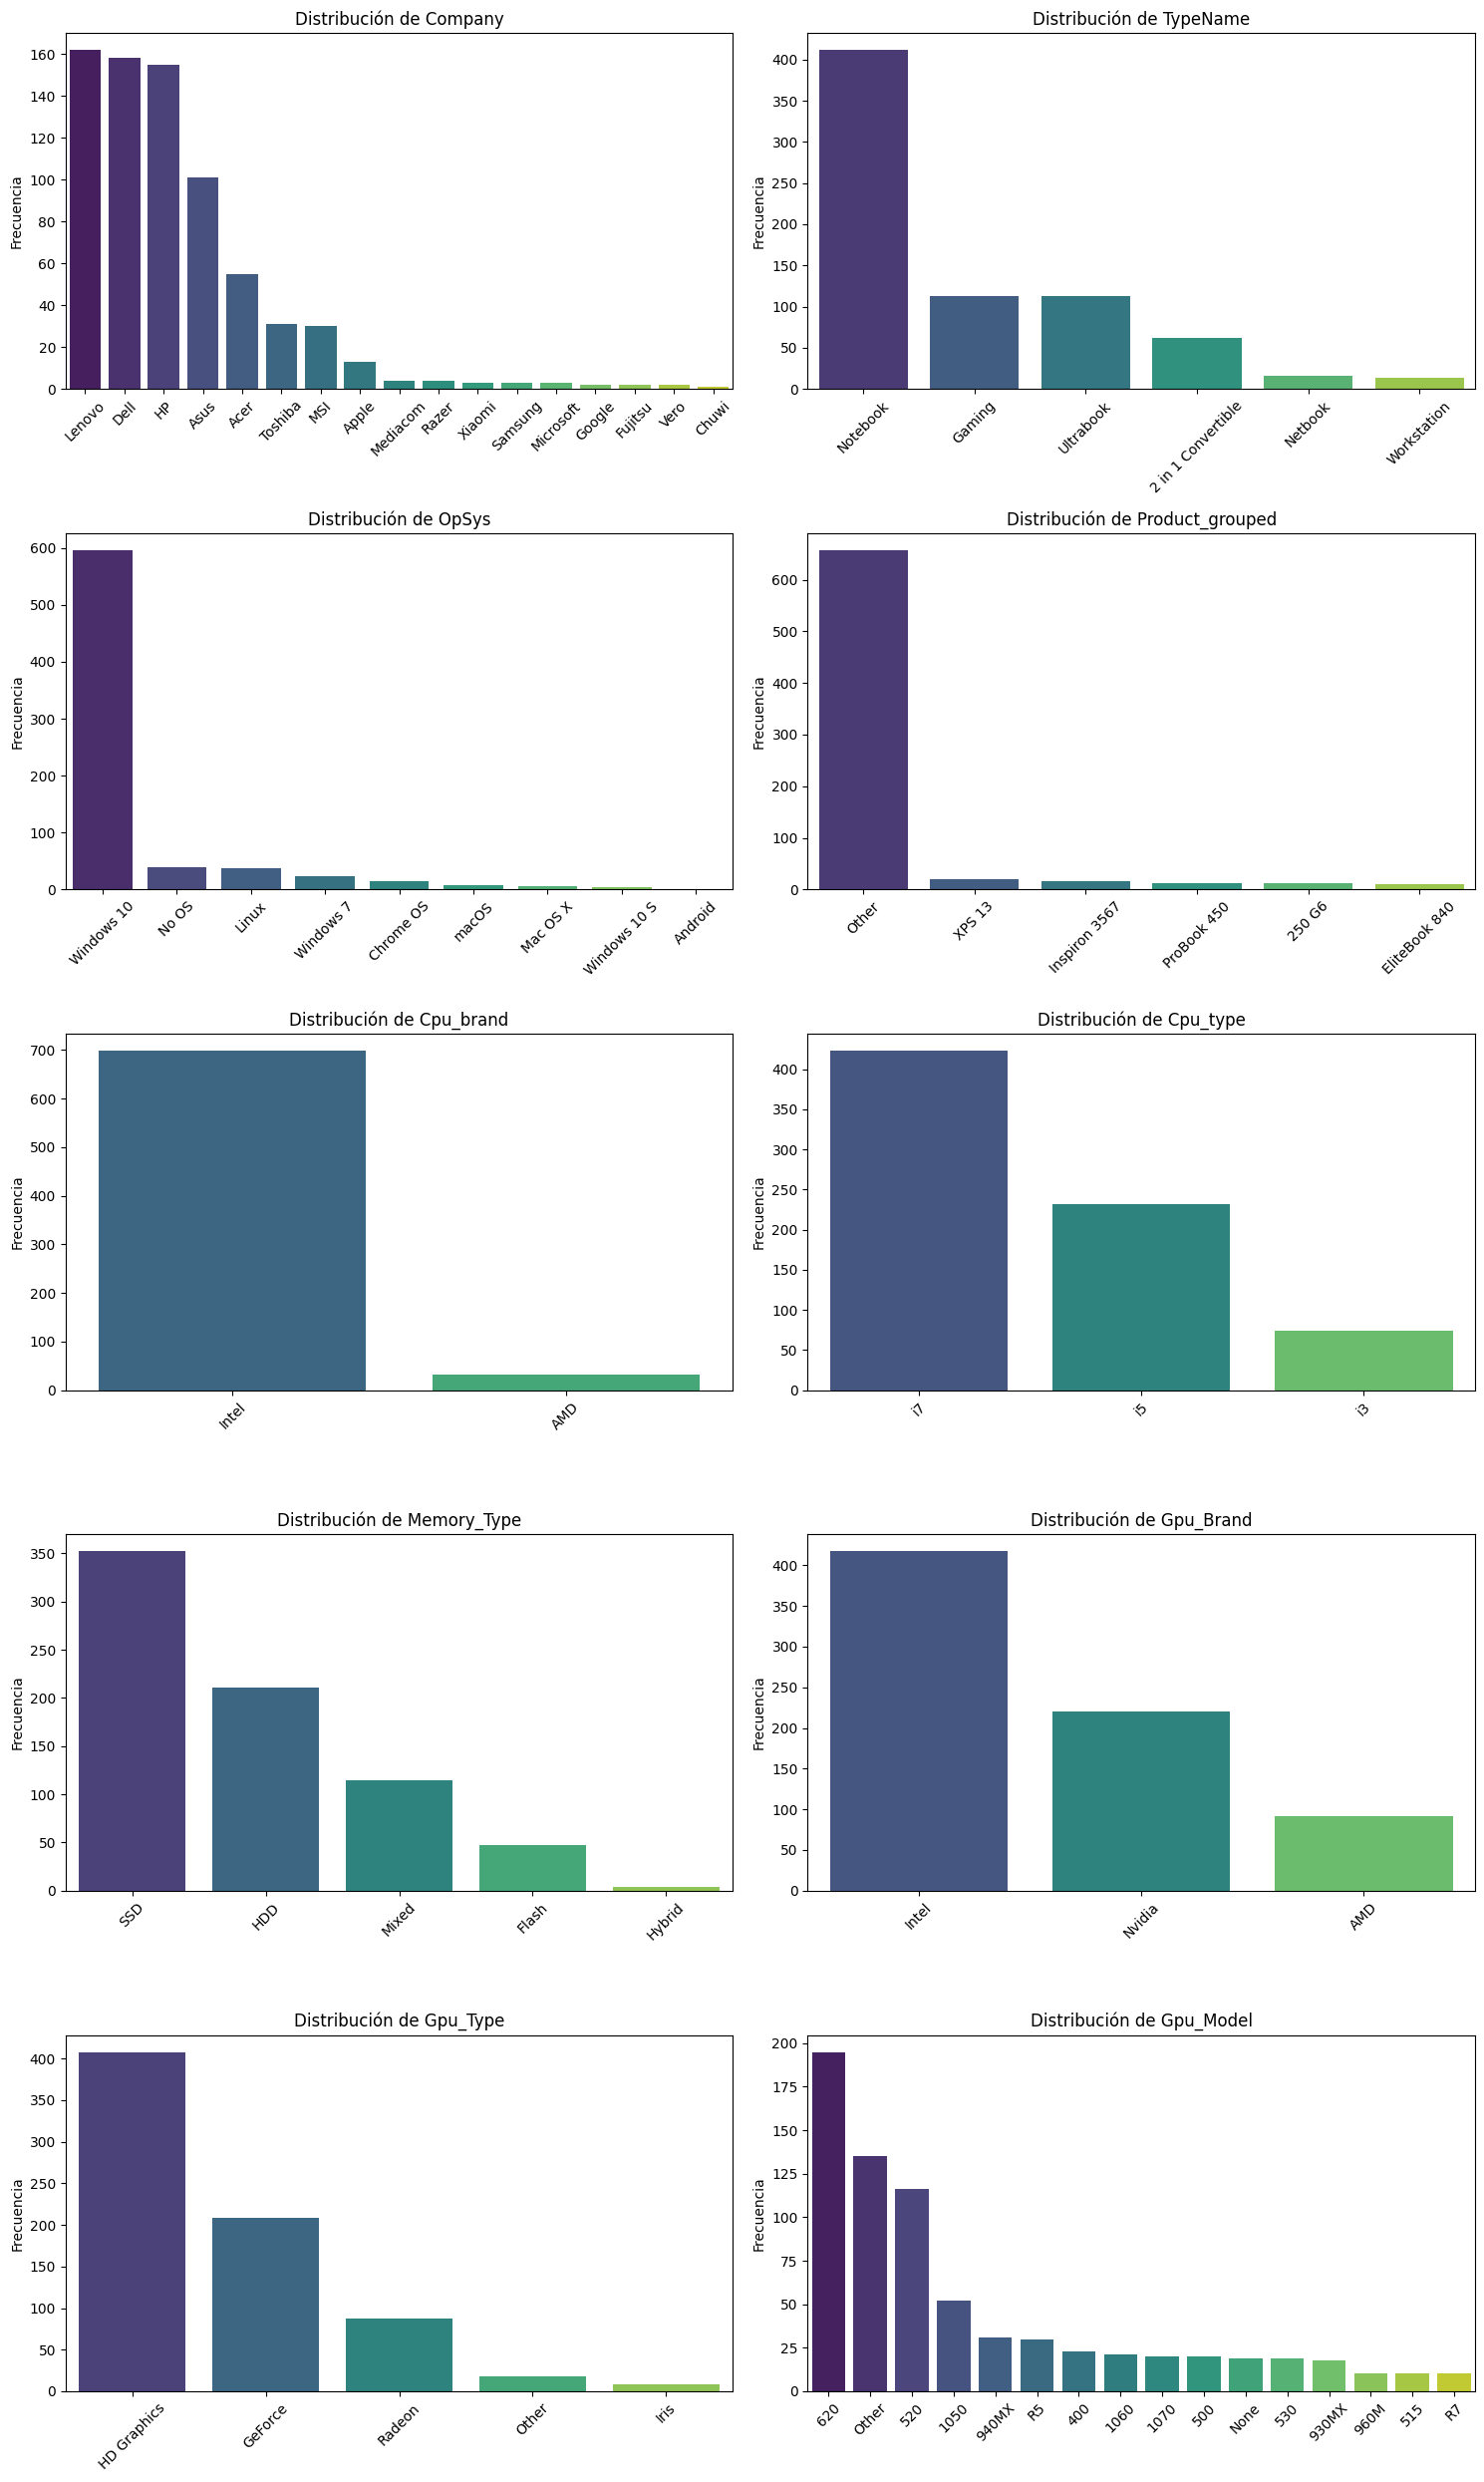

In [55]:
bt.pinta_distribucion_categoricas(X_train, features_cat, relativa=False, mostrar_valores=False)

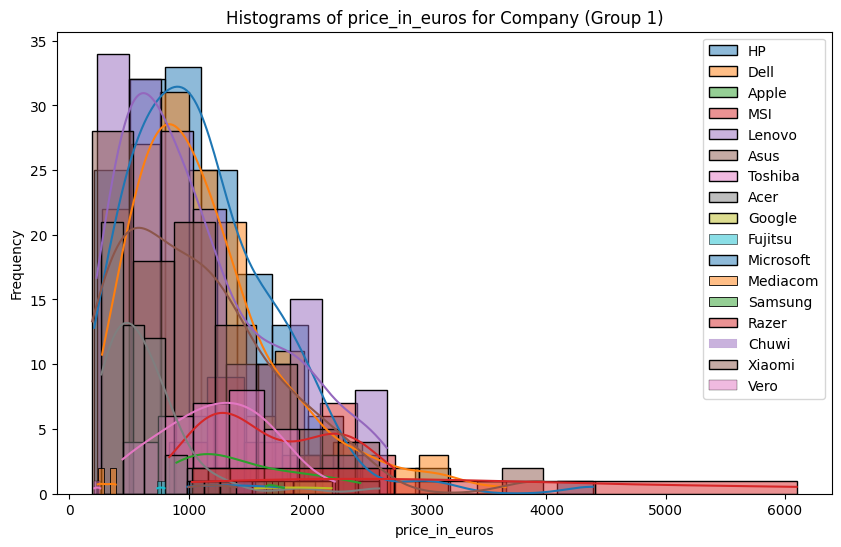

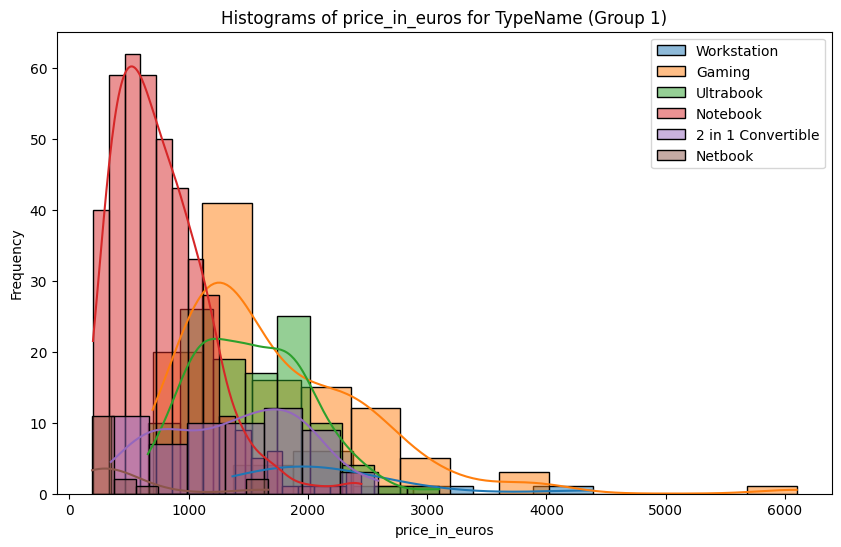

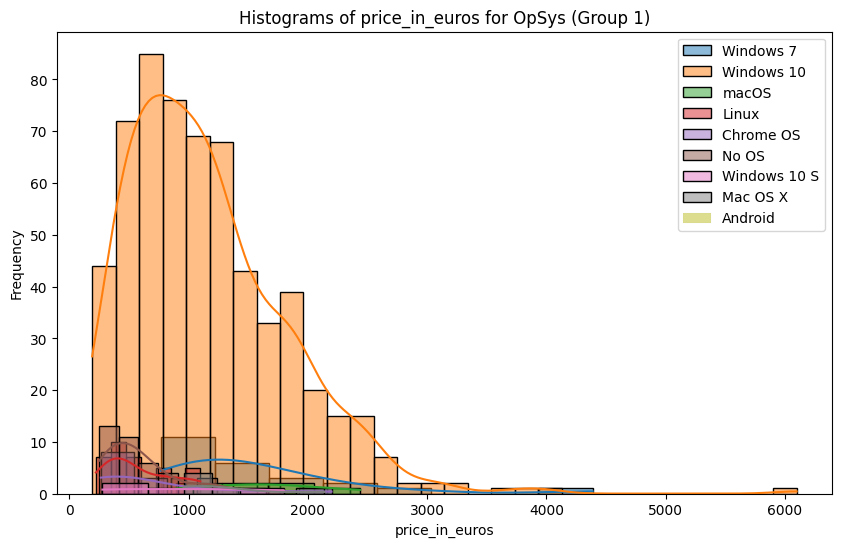

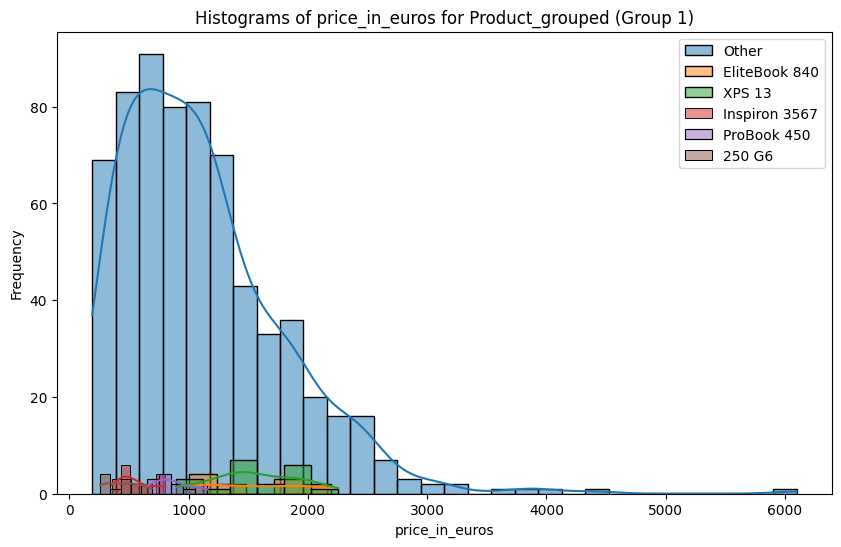

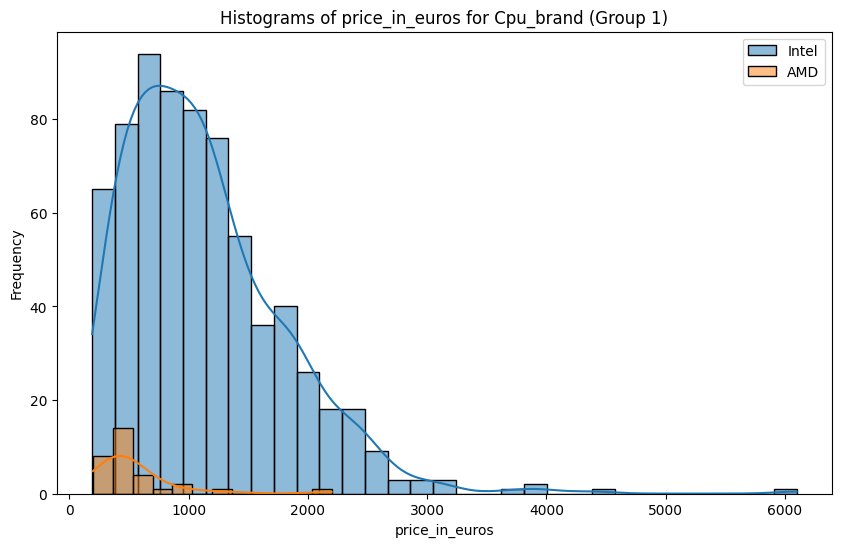

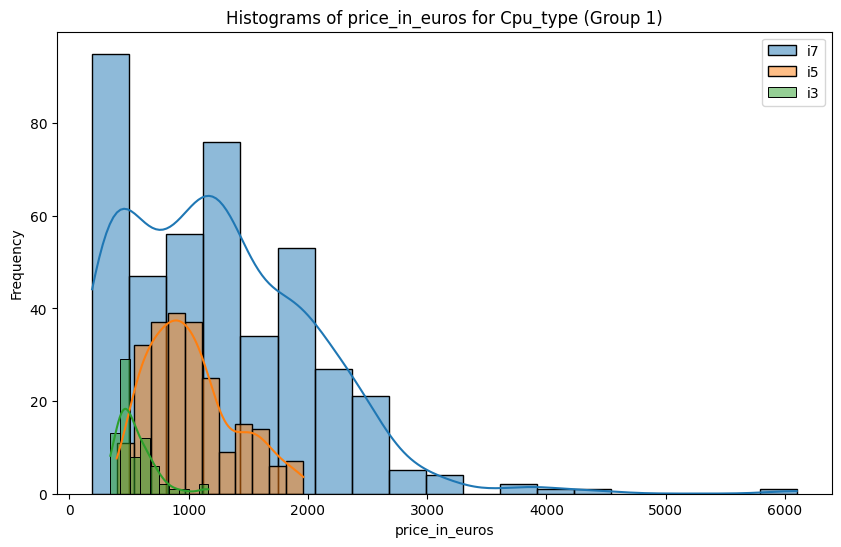

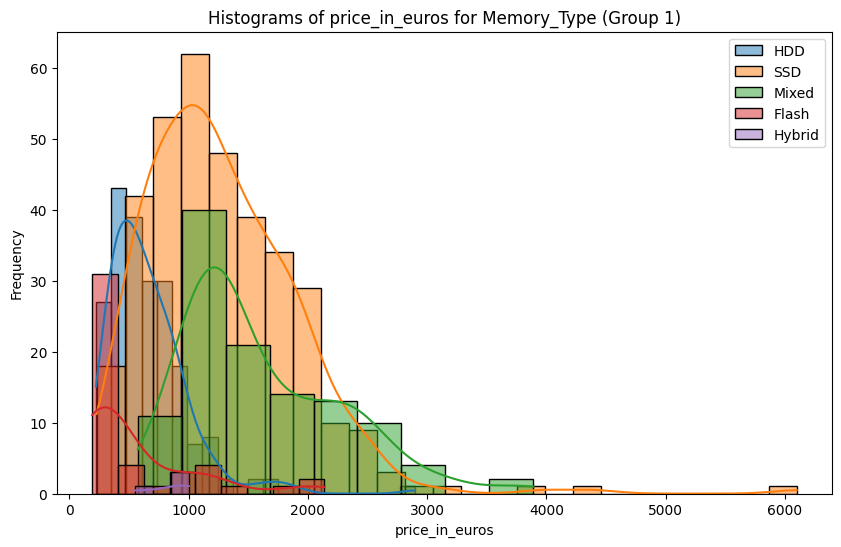

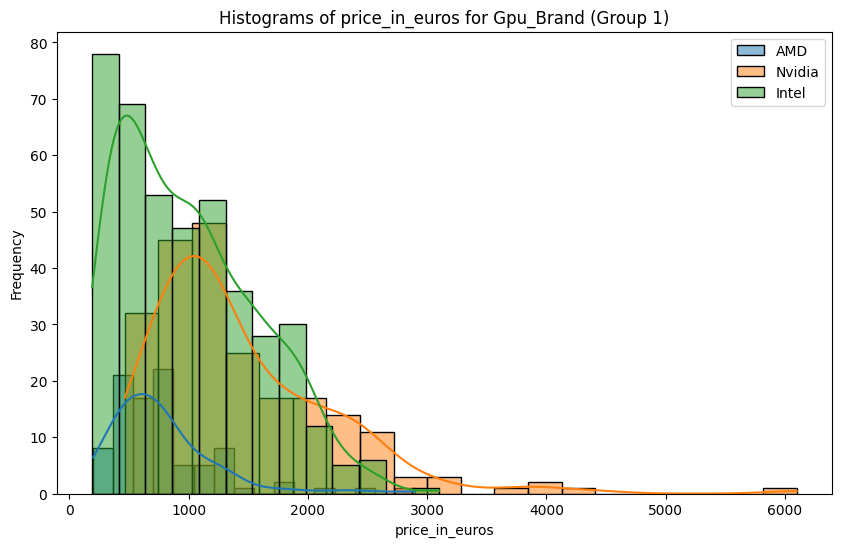

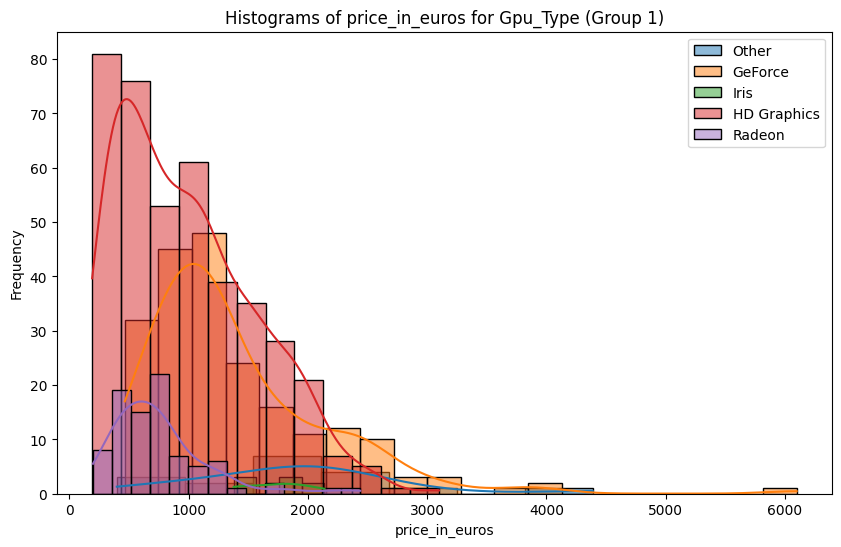

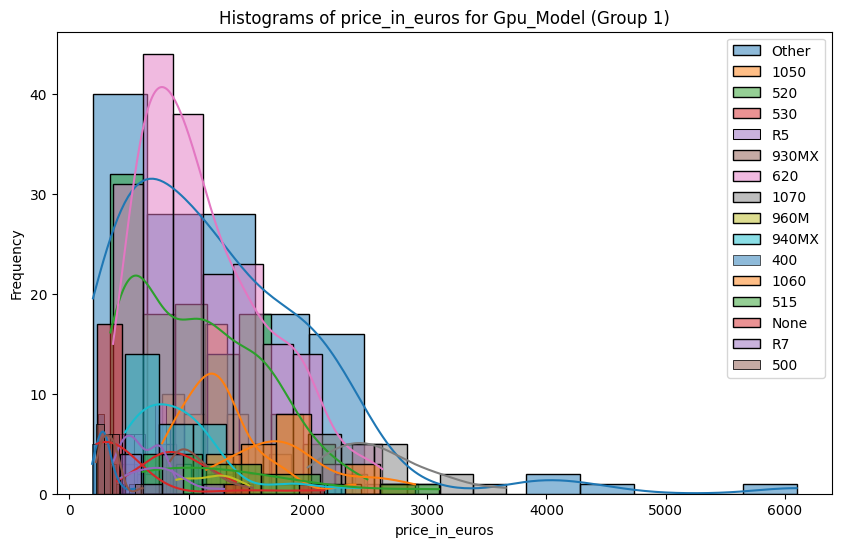

In [56]:
# Creamos un DataFrame temporal uniendo X e y
df_temporal = X_train.copy()
df_temporal['price_in_euros'] = y_train

# Ahora corremos el bucle usando el DataFrame temporal
for col in features_cat:
    bt.plot_grouped_histograms( df_temporal,  cat_col=col,  num_col='price_in_euros',  group_size=df_temporal[col].nunique())

In [57]:
df_temporal.corr(numeric_only=True)["price_in_euros"].sort_values(ascending=False)

price_in_euros    1.000000
Ram               0.744269
Height            0.544696
Width             0.544053
PPI               0.466640
Cpu_freq          0.385217
IPS               0.269970
Touchscreen       0.229258
Weight            0.202341
Memory_Size       0.184111
Inches            0.051334
Name: price_in_euros, dtype: float64

<Axes: >

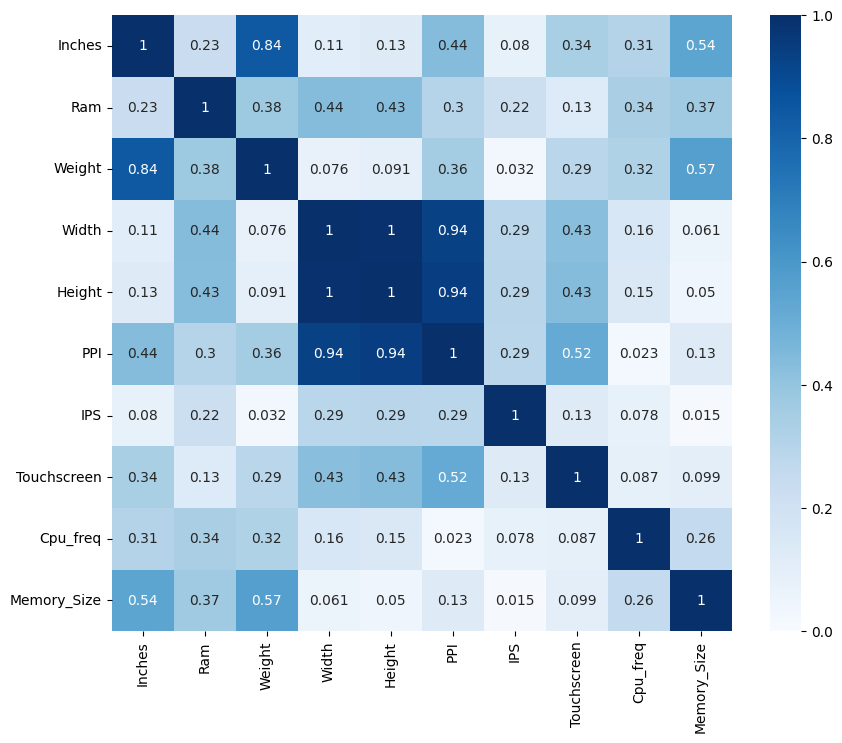

In [58]:
plt.figure(figsize= (10,8))
sns.heatmap(np.abs(X_train[features_num].corr(numeric_only= "True")), annot= True, cmap = "Blues", vmin= 0, vmax= 1)

Eliminar Inches
- No aporta información útil al precio.
- Su correlación con Price_in_euros es 0.05, prácticamente cero.
- Inches está muy correlacionado con Weight (0.84).

Eliminar Width
- Width y Height son prácticamente la misma variable (correlación 1.00).
- Width y PPI tienen correlación 0.94, lo que significa que PPI ya resume esa información.
- Entre Width y Height, Height tiene una correlación ligeramente mayor con el precio, así que Width es la menos útil de las dos.


In [59]:
X_train = X_train.drop(columns=["Inches", "Width"])
X_test = X_test.drop(columns=["Inches", "Width"])

In [60]:
from sklearn.preprocessing import OneHotEncoder

# 1. Identificamos las columnas categóricas basándonos SOLO en X_train
# Esto asegura que el modelo aprenda la estructura correcta desde el principio
features_cat = X_train.select_dtypes(include=['object']).columns.tolist()
features_num = X_train.select_dtypes(exclude=['object']).columns.tolist()

# 2. Configuramos el OneHotEncoder
# 'handle_unknown=ignore' evita errores si el test tiene categorías nuevas
# 'drop=None' suele ser más estable para principiantes, pero mantendremos 'first' si ya lo usabas
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# 3. Entrenamos (FIT) el encoder con el set de entrenamiento
ohe.fit(X_train[features_cat])
ohe_cols = ohe.get_feature_names_out(features_cat)

# 4. Función robusta para transformar cualquier set (X_train, X_test, X_pred)
def transformar_y_limpiar(df, ohe_instance, cat_cols, num_cols, final_column_names):
    # Solo procesamos si el dataframe tiene las columnas; si no, creamos un subset vacío
    # para evitar el KeyError que te salía antes
    df_cat = df[cat_cols] if all(c in df.columns for c in cat_cols) else df.reindex(columns=cat_cols).fillna('Unknown')
    
    # Transformación categórica
    cat_raw = ohe_instance.transform(df_cat)
    cat_df = pd.DataFrame(cat_raw, columns=final_column_names, index=df.index)
    
    # Selección de numéricas (asegurando que existan)
    num_df = df[num_cols] if all(c in df.columns for c in num_cols) else df.reindex(columns=num_cols).fillna(0)
    
    # Unión final
    return pd.concat([num_df, cat_df], axis=1)

# 5. Ejecutamos la transformación para los tres conjuntos
X_train_final = transformar_y_limpiar(X_train, ohe, features_cat, features_num, ohe_cols)
X_test_final = transformar_y_limpiar(X_test, ohe, features_cat, features_num, ohe_cols)

print(f"✅ ¡Hecho! Columnas en Train: {X_train_final.shape[1]}, Test: {X_test_final.shape[1]}")

✅ ¡Hecho! Columnas en Train: 70, Test: 70


c:\Users\asgr2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [61]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ram                            729 non-null    int64  
 1   Weight                         729 non-null    float64
 2   Height                         729 non-null    float64
 3   PPI                            729 non-null    float64
 4   IPS                            729 non-null    int64  
 5   Touchscreen                    729 non-null    int64  
 6   Cpu_freq                       729 non-null    float64
 7   Memory_Size                    729 non-null    float64
 8   Company_Apple                  729 non-null    float64
 9   Company_Asus                   729 non-null    float64
 10  Company_Chuwi                  729 non-null    float64
 11  Company_Dell                   729 non-null    float64
 12  Company_Fujitsu                729 non-null    float

In [62]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 451 to 260
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ram                            183 non-null    int64  
 1   Weight                         183 non-null    float64
 2   Height                         183 non-null    float64
 3   PPI                            183 non-null    float64
 4   IPS                            183 non-null    int64  
 5   Touchscreen                    183 non-null    int64  
 6   Cpu_freq                       183 non-null    float64
 7   Memory_Size                    183 non-null    float64
 8   Company_Apple                  183 non-null    float64
 9   Company_Asus                   183 non-null    float64
 10  Company_Chuwi                  183 non-null    float64
 11  Company_Dell                   183 non-null    float64
 12  Company_Fujitsu                183 non-null    float6

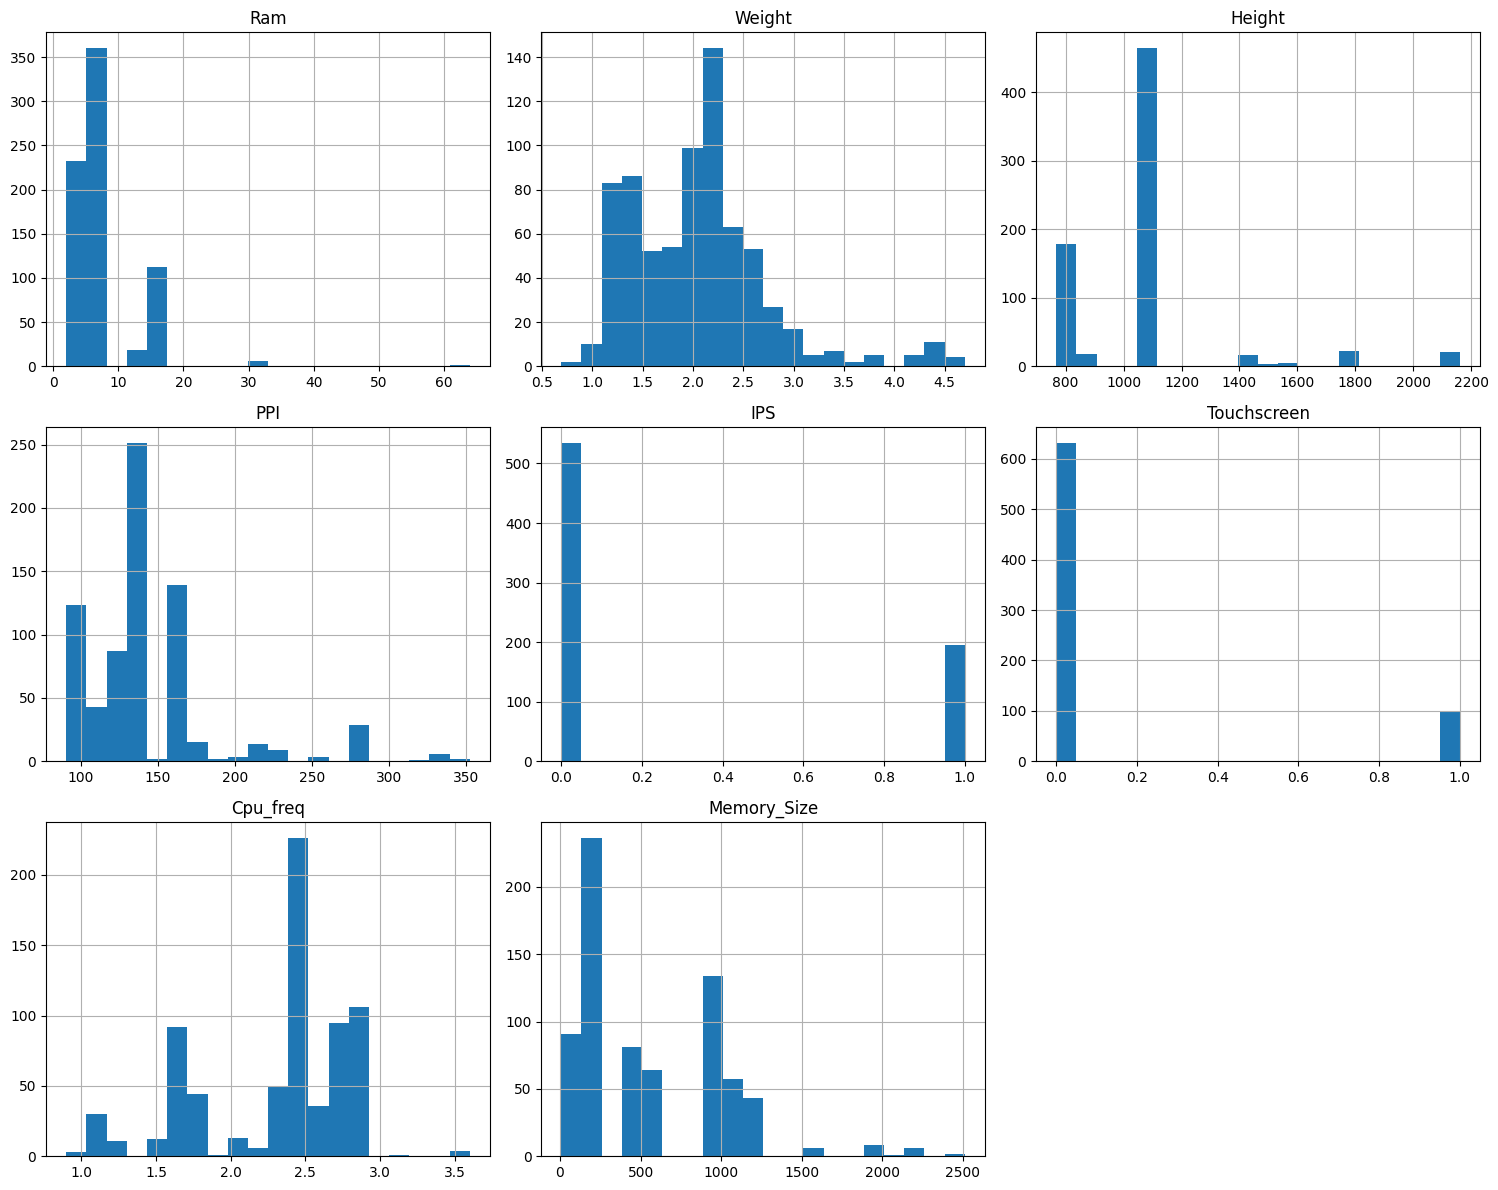

In [63]:
X_train_final[features_num].hist(bins=20, figsize=(15, 12))
plt.tight_layout()

In [64]:
X_train_final["Weight"] = np.sqrt(X_train_final["Weight"])
X_test_final["Weight"] = np.sqrt(X_test_final["Weight"])

X_train_final["Cpu_freq"] = np.log1p(X_train_final["Cpu_freq"])
X_test_final["Cpu_freq"] = np.log1p(X_test_final["Cpu_freq"])

X_train_final["Memory_Size"] = np.log1p(X_train_final["Memory_Size"])
X_test_final["Memory_Size"] = np.log1p(X_test_final["Memory_Size"])

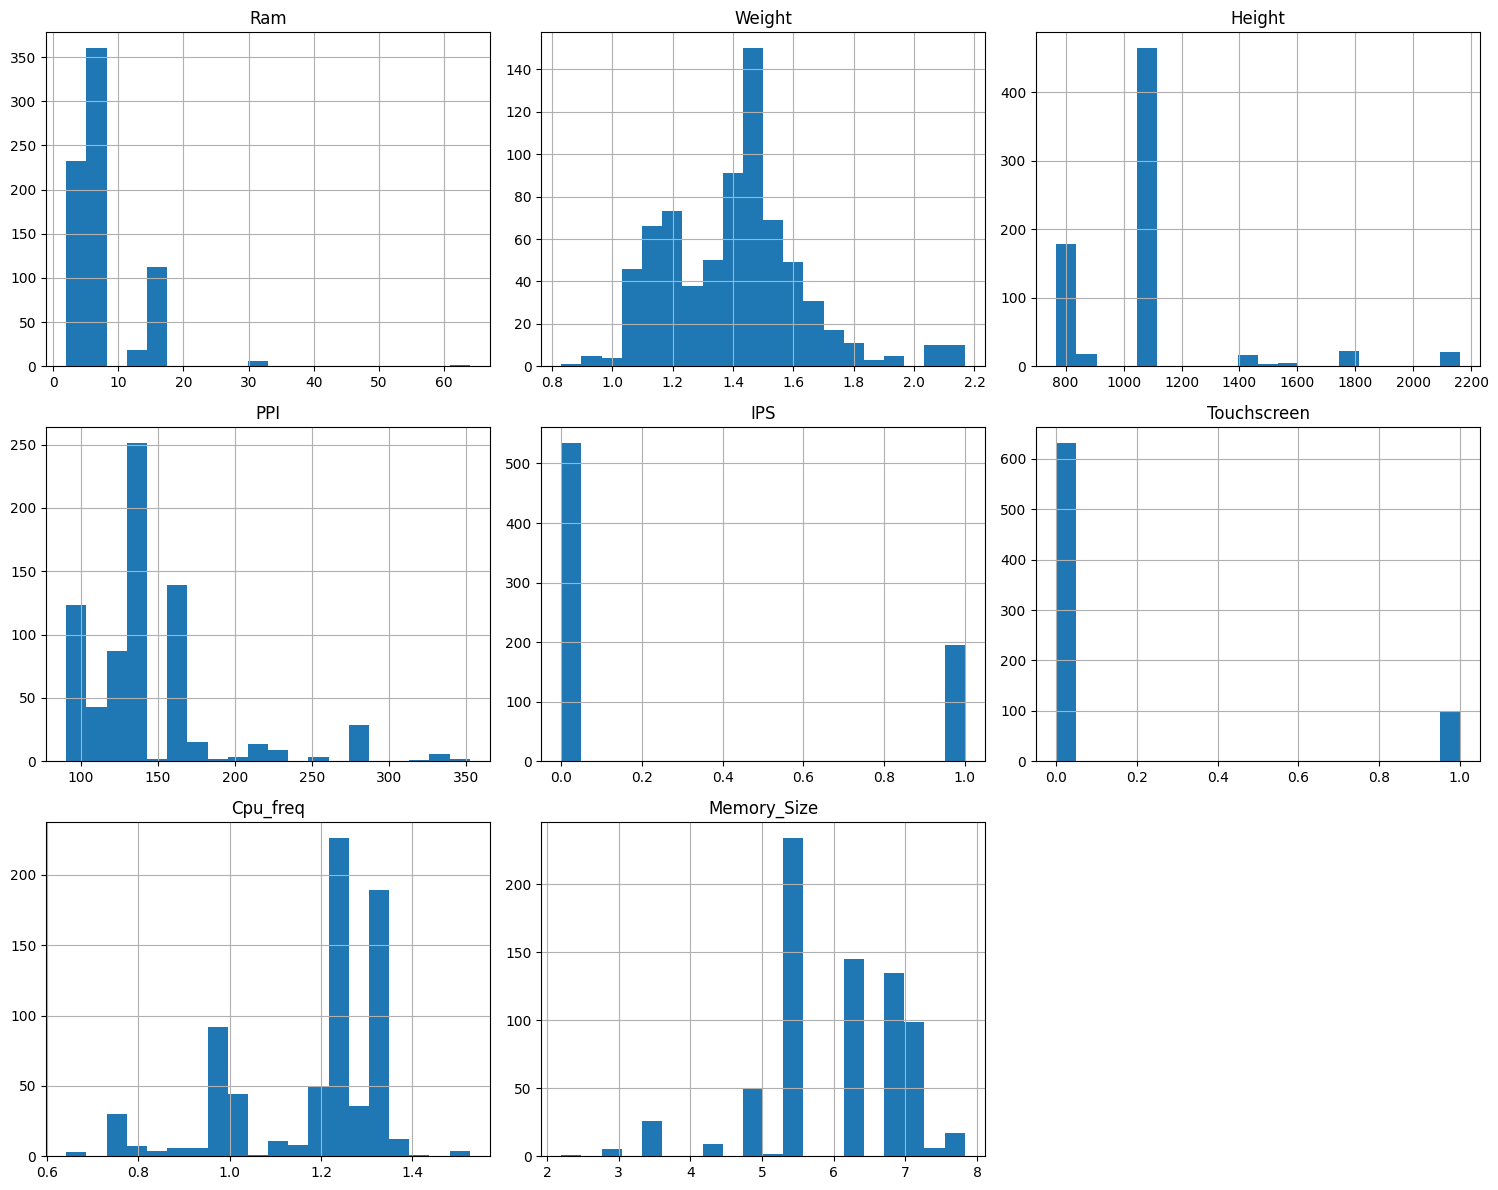

In [65]:
X_train_final[features_num].hist(bins=20, figsize=(15, 12))
plt.tight_layout()

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Columnas numéricas continuas que sí deben escalarse
cols_to_scale = ["Ram", "Weight", "Height", "PPI", "Cpu_freq", "Memory_Size"]

X_train_final[cols_to_scale] = scaler.fit_transform(X_train_final[cols_to_scale])
X_test_final[cols_to_scale] = scaler.transform(X_test_final[cols_to_scale])

In [98]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ram                            729 non-null    float64
 1   Weight                         729 non-null    float64
 2   Height                         729 non-null    float64
 3   PPI                            729 non-null    float64
 4   IPS                            729 non-null    int64  
 5   Touchscreen                    729 non-null    int64  
 6   Cpu_freq                       729 non-null    float64
 7   Memory_Size                    729 non-null    float64
 8   Company_Apple                  729 non-null    float64
 9   Company_Asus                   729 non-null    float64
 10  Company_Chuwi                  729 non-null    float64
 11  Company_Dell                   729 non-null    float64
 12  Company_Fujitsu                729 non-null    float

-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()

scores_lin = cross_val_score(
    lin_reg,
    X_train_final,
    y_train,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

print("Linear Regression (RMSE):", -scores_lin.mean())

Linear Regression (RMSE): 319.16009527749094


### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [68]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

modelos = ["LinearRegression", "RandomForest", "XGBoost", "LightGBM"]

lin = LinearRegression()

rf = RandomForestRegressor( 
    n_estimators=300,
    max_depth=10,
    random_state=42)

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgb = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42,
    verbose= -1,
    n_jobs=-1
)

lista_modelos = [lin, rf, xgb, lgb]

print("Evaluación de modelos (RMSE con CV=5):")

for nombre, modelo in zip(modelos, lista_modelos):
    scores = cross_val_score(
        modelo,
        X_train_final,
        y_train,
        cv=5,
        scoring="neg_root_mean_squared_error"
    )
    
    rmse = -scores.mean()
    print(f"{nombre}: RMSE = {rmse:.3f}")

Evaluación de modelos (RMSE con CV=5):
LinearRegression: RMSE = 319.160
RandomForest: RMSE = 288.368
XGBoost: RMSE = 267.205
LightGBM: RMSE = 310.706


### 4.3 Optimización (up to you 🫰🏻)

In [69]:
from sklearn.model_selection import GridSearchCV

# Random Forest

param_rf = {
    "n_estimators": [300, 500],
    "max_depth": [10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(
    rf,
    param_rf,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_grid.fit(X_train_final, y_train)
print("RF RMSE:", -rf_grid.best_score_)
print("RF params:", rf_grid.best_params_)

RF RMSE: 284.4259508053751
RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [70]:
# XGBOOST

param_xgb = {
    "n_estimators": [500, 1000],
    "learning_rate": [0.01, 0.05],
    "max_depth": [2, 3],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.7, 0.8],
    "reg_alpha": [0.1, 1]
}

xgb = XGBRegressor(
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

xgb_grid = GridSearchCV(
    xgb,
    param_xgb,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

xgb_grid.fit(X_train_final, y_train)
print("\nXGB RMSE:", -xgb_grid.best_score_)
print("XGB params:", xgb_grid.best_params_)


XGB RMSE: 260.21678242372207
XGB params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 1, 'subsample': 0.7}


In [71]:
# LightGBM

param_lgb = {
    "n_estimators": [200, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [-1, 10],
    "num_leaves": [31, 50],
    "subsample": [0.8, 1.0]
}

lgb = LGBMRegressor(
    random_state=42,
    n_jobs=-1,
    verbose=-1,
    verbosity=-1,
    silent=True
)

lgb_grid = GridSearchCV(
    lgb,
    param_lgb,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

lgb_grid.fit(X_train_final, y_train)
print("\nLGBM RMSE:", -lgb_grid.best_score_)
print("LGBM params:", lgb_grid.best_params_)


LGBM RMSE: 309.67751436437914
LGBM params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 0.8}


In [72]:
mejor_modelo = xgb_grid.best_estimator_

# para asegurar el  mismo orden de las columnas
X_test_final = X_test_final[X_train_final.columns]

y_pred = mejor_modelo.predict(X_test_final)

# Métricas
from sklearn.metrics import root_mean_squared_error
print("RMSE Final Real:", root_mean_squared_error(y_test, y_pred))

RMSE Final Real: 288.23127618172043


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [73]:
X_pred = pd.read_csv("./data/test.csv", index_col= "laptop_ID")
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [74]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [75]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [76]:
X_pred

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg
...,...,...,...,...,...,...,...,...,...,...,...
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg


In [77]:
X_pred["Product_grouped"] = X_pred["Product"].where(X_pred["Product"].isin(top_5_products), other="Other")
X_pred = X_pred.drop(columns=["Product"])

In [78]:
X_pred["Width"] = X_pred["ScreenResolution"].str.extract(r'(\d+)x')[0].astype(float)
X_pred["Height"] = X_pred["ScreenResolution"].str.extract(r'x(\d+)')[0].astype(float)

X_pred["PPI"] = ((X_pred["Width"]**2 + X_pred["Height"]**2)**0.5) / X_pred["Inches"]

X_pred["IPS"] = X_pred["ScreenResolution"].str.contains("IPS", case=False).astype(int)
X_pred["Touchscreen"] = X_pred["ScreenResolution"].str.contains("Touchscreen", case=False).astype(int)

X_pred = X_pred.drop(columns=["ScreenResolution"])

In [79]:
X_pred["Cpu_brand"] = X_pred["Cpu"].str.split().str[0]

X_pred["Cpu_type"] = X_pred["Cpu"].str.extract(r'(i3|i5|i7|i9)')

X_pred["Cpu_freq"] = X_pred["Cpu"].str.extract(r'(\d+\.\d+)').astype(float)

X_pred = X_pred.drop(columns=["Cpu"])

In [80]:
X_pred["Ram"] = X_pred["Ram"].str.replace("GB", "").astype(int)

In [81]:
X_pred[["Memory_Size", "Memory_Type"]] = X_pred["Memory"].apply(procesar_memoria)
X_pred = X_pred.drop(columns=["Memory"])

In [83]:
X_pred["Gpu_Brand"] = X_pred["Gpu"].str.split().str[0]

In [85]:
X_pred["Gpu_Type"] = X_pred["Gpu"].apply(obtener_gpu_type)
X_pred["Gpu_Model"] = X_pred["Gpu"].apply(extraer_gpu_model)
X_pred = X_pred.drop(columns=["Gpu"])

In [86]:
X_pred["Weight"] = X_pred["Weight"].str.replace("kg", "").astype(float)

In [87]:
X_pred

,Company,TypeName,Inches,Ram,OpSys,Weight,Product_grouped,Width,Height,PPI,IPS,Touchscreen,Cpu_brand,Cpu_type,Cpu_freq,Memory_Size,Memory_Type,Gpu_Brand,Gpu_Type,Gpu_Model
209,Lenovo,Gaming,15.6,16,No OS,2.400,Other,1920.0,1080.0,141.211998,0,0,Intel,i7,2.8,512.0,SSD,Nvidia,GeForce,1060
1281,Acer,Notebook,15.6,4,Linux,2.400,Other,1366.0,768.0,100.454670,0,0,Intel,NaN,1.6,500.0,HDD,Intel,HD Graphics,400
1168,Lenovo,Notebook,15.6,4,No OS,1.900,Other,1366.0,768.0,100.454670,0,0,Intel,i3,2.0,1000.0,HDD,Intel,HD Graphics,520
1231,Dell,2 in 1 Convertible,15.6,8,Windows 10,2.191,Other,1920.0,1080.0,141.211998,1,1,Intel,i5,2.5,256.0,SSD,Intel,HD Graphics,620
1020,HP,Notebook,14.0,4,Windows 10,1.950,Other,1920.0,1080.0,157.350512,0,0,Intel,i5,2.5,256.0,SSD,Intel,HD Graphics,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,MSI,Gaming,17.3,16,Windows 10,2.900,Other,1920.0,1080.0,127.335675,0,0,Intel,i7,2.8,1512.0,Mixed,Nvidia,GeForce,1070
948,Toshiba,Notebook,14.0,4,Windows 10,1.470,Other,1920.0,1080.0,157.350512,1,0,Intel,i5,2.3,128.0,SSD,Intel,HD Graphics,520
483,Dell,Workstation,15.6,8,Windows 10,1.780,Other,1920.0,1080.0,141.211998,0,0,Intel,i7,2.8,256.0,SSD,Nvidia,Other,M1200
1017,HP,Notebook,14.0,4,Windows 10,1.640,Other,1366.0,768.0,111.935204,0,0,Intel,i5,2.5,500.0,HDD,Intel,HD Graphics,620


In [88]:
X_pred["Cpu_type"] = X_pred["Cpu_type"].fillna(moda_type)
X_pred["Cpu_freq"] = X_pred["Cpu_freq"].fillna(mediana_freq)

In [90]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          391 non-null    object 
 1   TypeName         391 non-null    object 
 2   Inches           391 non-null    float64
 3   Ram              391 non-null    int64  
 4   OpSys            391 non-null    object 
 5   Weight           391 non-null    float64
 6   Product_grouped  391 non-null    object 
 7   Width            391 non-null    float64
 8   Height           391 non-null    float64
 9   PPI              391 non-null    float64
 10  IPS              391 non-null    int64  
 11  Touchscreen      391 non-null    int64  
 12  Cpu_brand        391 non-null    object 
 13  Cpu_type         391 non-null    object 
 14  Cpu_freq         391 non-null    float64
 15  Memory_Size      391 non-null    float64
 16  Memory_Type      391 non-null    object 
 17  Gpu_Brand        39

In [91]:
X_pred["Gpu_Model"] = X_pred["Gpu_Model"].replace(modelos_menos_10, "Other")

In [92]:
X_pred = X_pred.drop(columns=["Inches", "Width"])

In [93]:
X_pred_final = transformar_y_limpiar(X_pred, ohe, features_cat, features_num, ohe_cols)

c:\Users\asgr2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_encoders.py:261: UserWarning: Found unknown categories in columns [0, 4, 7, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [95]:
X_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ram                            391 non-null    int64  
 1   Weight                         391 non-null    float64
 2   Height                         391 non-null    float64
 3   PPI                            391 non-null    float64
 4   IPS                            391 non-null    int64  
 5   Touchscreen                    391 non-null    int64  
 6   Cpu_freq                       391 non-null    float64
 7   Memory_Size                    391 non-null    float64
 8   Company_Apple                  391 non-null    float64
 9   Company_Asus                   391 non-null    float64
 10  Company_Chuwi                  391 non-null    float64
 11  Company_Dell                   391 non-null    float64
 12  Company_Fujitsu                391 non-null    float6

In [96]:
X_pred_final["Weight"] = np.sqrt(X_pred_final["Weight"])


X_pred_final["Cpu_freq"] = np.log1p(X_pred_final["Cpu_freq"])


X_pred_final["Memory_Size"] = np.log1p(X_pred_final["Memory_Size"])


In [97]:
X_pred_final[cols_to_scale] = scaler.transform(X_pred_final[cols_to_scale])

In [99]:
X_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ram                            391 non-null    float64
 1   Weight                         391 non-null    float64
 2   Height                         391 non-null    float64
 3   PPI                            391 non-null    float64
 4   IPS                            391 non-null    int64  
 5   Touchscreen                    391 non-null    int64  
 6   Cpu_freq                       391 non-null    float64
 7   Memory_Size                    391 non-null    float64
 8   Company_Apple                  391 non-null    float64
 9   Company_Asus                   391 non-null    float64
 10  Company_Chuwi                  391 non-null    float64
 11  Company_Dell                   391 non-null    float64
 12  Company_Fujitsu                391 non-null    float6

In [100]:
predictions_submit = mejor_modelo.predict(X_pred_final)
predictions_submit

array([1499.2412 ,  280.3426 ,  291.30167,  991.12274, 1009.017  ,
        294.50922,  829.9    ,  991.1269 , 1187.6609 ,  314.83493,
       2277.3098 , 1345.4589 ,  477.2163 , 1796.8752 ,  885.1579 ,
        755.3595 , 2007.3643 , 1276.5852 , 2045.6278 ,  701.47473,
       1618.0806 ,  368.4946 ,  750.90894, 1161.4673 ,  338.70227,
        721.18854,  615.6611 ,  756.40607, 2110.0093 , 1055.5106 ,
       2418.666  ,  422.45126,  856.1005 , 3213.0942 , 2055.3884 ,
       1595.1786 ,  691.0003 , 1276.6407 , 1001.3077 , 1673.3777 ,
        694.8226 ,  760.34863,  589.4737 , 1246.7839 , 1160.7147 ,
       1069.4447 , 1075.8494 ,  635.1287 ,  662.479  ,  436.4964 ,
       1664.06   ,  734.4721 , 1132.9806 ,  483.94397, 2035.7727 ,
       1681.2192 ,  733.0321 ,  879.788  ,  992.852  ,  587.9377 ,
       2940.9768 , 2042.3129 ,  508.80862, 2065.5784 , 1170.2762 ,
       1353.6519 ,  977.2906 , 1125.3958 , 1686.0793 , 1875.0444 ,
        898.3524 ,  661.5643 , 1069.888  , 1702.1262 ,  936.05

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [101]:
sample = pd.read_csv("data/sample_submission.csv")

In [102]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [103]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [104]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index, "Price_in_euros": predictions_submit})

In [105]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1499.241211
1,1281,280.342590
2,1168,291.301666
3,1231,991.122742
4,1020,1009.017029


In [106]:
submission.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [107]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [108]:
chequeador(submission)

You're ready to submit!
